In [3]:
from google.colab import drive
#

ModuleNotFoundError: No module named 'google'

# Dataset on Huggingface
https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023

In [4]:
!pip install ujson


In [5]:
from huggingface_hub import hf_hub_download
from datasets import load_dataset
import pandas as pd
import ujson as json
import os

REV_PATH = "raw/review_categories/Grocery_and_Gourmet_Food.jsonl"
rev_file = hf_hub_download(
repo_id="McAuley-Lab/Amazon-Reviews-2023",
filename=REV_PATH,
repo_type="dataset",
)
ds_reviews = load_dataset("json", data_files=rev_file, split="train")

In [6]:
print(ds_reviews)

Dataset({
    features: ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase'],
    num_rows: 14318520
})


In [7]:
records = ds_reviews.select(range(20000))  # grab first 100 rows
df_reviews = pd.json_normalize(records, sep=".")

print(df_reviews.head(20))


    rating                                              title  \
0      5.0                                 Excellent!  Yummy!   
1      5.0                                  Delicious!!! Yum!   
2      5.0             Extremely Delicious, but expensive imo   
3      5.0                                         Delicious!   
4      5.0                                        Great taste   
5      5.0                                             Yummy!   
6      5.0                     Excellent tea & smells divine!   
7      5.0                   Like drinking a wedding bouquet!   
8      5.0                                         Delicious!   
9      5.0                          Yummy tea with a cool tin   
10     5.0                                         Yummy tea!   
11     5.0                                         Delicious!   
12     5.0                        Yummy with jasmine flowers!   
13     5.0  OMG- purple tea! Color me happy!  Yum yum yummy!!   
14     5.0               

# Found a way to import meta dataset

In [8]:
from datasets import Dataset

REV_PATH = "raw/meta_categories/meta_Grocery_and_Gourmet_Food.jsonl"
rev_file = hf_hub_download(
repo_id="McAuley-Lab/Amazon-Reviews-2023",
filename=REV_PATH,
repo_type="dataset",
)

df = pd.read_json(
    rev_file,
    lines=True,
)

df = df[df['main_category'] == 'Grocery']

df.head(5)


,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,Grocery,Dark Roast Pure Coffee,4.7,9,[],[],None,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'YouCut_20220Cafe Du Monde Coffee C...,Luzianne,"[Grocery & Gourmet Food, Beverages, Coffee]","{'Brand': 'Luzianne', 'Item Form': 'Ground', '...",B00NE08WM6,NaN,NaN,NaN
1,Grocery,PICARAS Galletas Peruanas Bañadas en Chocolate...,4.5,12,[2 Bags of PICARAS Galletas Bañadas en Chocola...,[2 Bags of PICARAS Galletas Bañadas en Chocola...,15.99,[{'thumb': 'https://m.media-amazon.com/images/...,[],Winters,"[Grocery & Gourmet Food, Breads & Bakery, Cook...","{'Flavor': 'chocolate', 'Unit Count': '12.00 C...",B084Q13Q5Q,NaN,NaN,NaN
2,Grocery,Chipped Beef and Gravy By Patterson's - Great ...,3.2,5,[Six (6) 8-ounce cans of delicious chipped bee...,[Delicious corned beef gravy is ready when you...,None,[{'thumb': 'https://m.media-amazon.com/images/...,[],Pattersons,"[Grocery & Gourmet Food, Pantry Staples, Canne...",{'Package Dimensions': '8.4 x 5.8 x 3.4 inches...,B00KBRUYVM,NaN,NaN,NaN
3,Grocery,Asher's Sugar Free Milk Chocolate Cordial Cher...,5.0,6,[],[],29.99,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'No Sugar Added Chocolate Truffles'...,Generic,"[Grocery & Gourmet Food, Snacks & Sweets, Choc...","{'Brand': 'Generic', 'Item Form': 'Ball', 'Cho...",B0BN4PW255,NaN,NaN,NaN
4,Grocery,Messmer Peppermint 25 bags (6er pack),3.5,5,[],[],29.99,[{'thumb': 'https://m.media-amazon.com/images/...,[],Messmer,[],"{'Brand': 'Messmer', 'Item Form': 'Teabags', '...",B06X9DC27H,NaN,NaN,NaN


In [9]:
keep_cols = ["average_rating", "rating_number","details","parent_asin"]

df = df[keep_cols]
df["details"] = df["details"].str.get("Flavor")
print(df.head(5))

   average_rating  rating_number    details parent_asin
0             4.7              9       None  B00NE08WM6
1             4.5             12  chocolate  B084Q13Q5Q
2             3.2              5       None  B00KBRUYVM
3             5.0              6  Chocolate  B0BN4PW255
4             3.5              5       None  B06X9DC27H


In [10]:
df = df.dropna(subset=['details'])
display(df.head())

,average_rating,rating_number,details,parent_asin
1,4.5,12,chocolate,B084Q13Q5Q
3,5.0,6,Chocolate,B0BN4PW255
6,5.0,2,Red Crab,B002HQF1BI
18,4.4,157,Savory,B005GTTQMI
23,4.2,474,Cherry,B097NMZRBR


In [11]:
rating_num_median = df['rating_number'].median()
print(rating_num_median)
print(df.shape)

15.0
(138685, 4)


In [ ]:
df = df[df['rating_number'] >= rating_num_median]
print(df.head(10))

    average_rating  rating_number             details parent_asin
18             4.4            157              Savory  B005GTTQMI
23             4.2            474              Cherry  B097NMZRBR
26             4.6             41                 Hot  B00AN0ODVY
36             4.7            503                cafe  B01EM498G6
37             3.7            493     10 PACK SAMPLER  B07CP39T8G
39             4.0             58            Licorice  B00NZ8OCNU
40             4.0             19           Chamomile  B07ZVBKYWV
41             4.4             47                Pork  B088GYGLZG
42             4.2             21            Barbecue  B077V3RTZV
45             4.6             66  Sweet or Scary Mix  B01LXZTQB1


# **Filtering flavors**

In [12]:
top_flavors = df["details"].value_counts().nlargest(25).index

df = df[df["details"].isin(top_flavors)]

print(df["details"].value_counts())

details
Chocolate         7379
Original          2456
Assorted          2146
Caramel           2002
Vanilla           1953
Fruit             1866
Milk Chocolate    1818
Dark Chocolate    1794
Strawberry        1636
Lemon             1541
Beef              1451
Coffee            1422
Orange            1401
Cherry            1397
Cinnamon          1336
Mint              1290
Peppermint        1193
Coconut           1185
Espresso          1016
Honey              923
Butter             909
Almond             887
Salted             868
Sour               839
Ginger             833
Name: count, dtype: int64


Deleting irrelvant flavors

In [13]:
irrelevant = ["Original", "Assorted"]
df = df[~df["details"].isin(irrelevant)]
df.head(25)

,average_rating,rating_number,details,parent_asin
3,5.0,6,Chocolate,B0BN4PW255
23,4.2,474,Cherry,B097NMZRBR
27,3.4,7,Strawberry,B0773JLNTD
28,4.0,1,Butter,B0073GRBJW
32,4.6,6,Vanilla,B011JBS87K
58,4.8,209,Salted,B07C23R6C6
62,3.2,11,Chocolate,B07NJ1HHQR
69,4.7,665,Peppermint,B00250M2ZY
72,3.6,52,Chocolate,B096XY398G
82,4.5,15,Salted,B00EOKGIOY


In [14]:
df.shape

(36939, 4)

In [15]:
df_merged_inner = pd.merge(
    df,
    df_reviews,
    on='parent_asin',
    how='inner'
)

columns_to_drop = [
    'images',
    'asin',
    'helpful_vote',
    'verified_purchase',
    'title'
]

df_merged_inner.drop(columns=columns_to_drop, axis=1, inplace=True)

print(df_merged_inner.columns.tolist())
print(f"\nNew DataFrame shape: {df_merged_inner.shape}")

print(df_merged_inner.head(5))


['average_rating', 'rating_number', 'details', 'parent_asin', 'rating', 'text', 'user_id', 'timestamp']

New DataFrame shape: (665, 8)
   average_rating  rating_number     details parent_asin  rating  \
0             4.2            474      Cherry  B097NMZRBR     5.0   
1             4.7            665  Peppermint  B00250M2ZY     4.0   
2             3.6             52   Chocolate  B096XY398G     5.0   
3             4.6           1474       Lemon  B0C7RH8PQQ     5.0   
4             4.6           1474       Lemon  B0C7RH8PQQ     3.0   

                                                text  \
0  Very fresh... they remind me of the candy I wo...   
1  These are a little like a butter mint... they ...   
2  great for baking whether you warm it for choco...   
3  Absolutely addicting-any flavor.  The only pro...   
4  I have been looking for a great lemon cookie. ...   

                        user_id      timestamp  
0  AHQE5UGNEVWAJN6X7JN6RNQTIPWQ  1616344952930  
1  AFZUK3MTBIBEDQOPAK

In [16]:
irrelevant = ["Original", "Assorted"]

df_clean = df_merged_inner[~df_merged_inner["details"].isin(irrelevant)]

df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'], unit='ms')
df_clean['year_month'] = df_clean['timestamp'].dt.to_period('M').astype(str)

trend_df = (
    df_clean
    .groupby(['details', 'year_month'])['rating']
    .mean()
    .reset_index()
)

df_merged_inner.columns

Index(['average_rating', 'rating_number', 'details', 'parent_asin', 'rating',
       'text', 'user_id', 'timestamp'],
      dtype='object')

In [17]:
df_merged_inner.columns

# ['average_rating', 'rating_number', 'details', 'parent_asin', 
#  'rating', 'text', 'user_id', 'timestamp']

df_merged_inner['details'].unique()

import pandas as pd
#Convert timestamp to datetime
df_merged_inner['timestamp'] = pd.to_datetime(df_merged_inner['timestamp'], unit='ms')
#df_merged_inner['year_month'] = df_merged_inner['timestamp'].dt.to_period('M').astype(str)
df_merged_inner['year_month'] = df_merged_inner['timestamp'].dt.to_period('M').dt.to_timestamp()


#avg rating per month
trend_df = (
    df_merged_inner
    .groupby(['details', 'year_month'])['rating']
    .mean()
    .reset_index()
)
trend_df.head()


# trend_df['details'].value_counts()
# trend_df.head(20)


,details,year_month,rating
0,Almond,2012-11-01,5.0
1,Almond,2015-08-01,5.0
2,Almond,2017-10-01,3.0
3,Almond,2018-12-01,1.0
4,Almond,2019-01-01,3.0


Average Rating of Top 10 Most-Reviewed Flavors

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Chocolate'),
  Text(1, 0, 'Caramel'),
  Text(2, 0, 'Dark Chocolate'),
  Text(3, 0, 'Vanilla'),
  Text(4, 0, 'Milk Chocolate'),
  Text(5, 0, 'Lemon'),
  Text(6, 0, 'Cinnamon'),
  Text(7, 0, 'Butter'),
  Text(8, 0, 'Coffee'),
  Text(9, 0, 'Orange')])

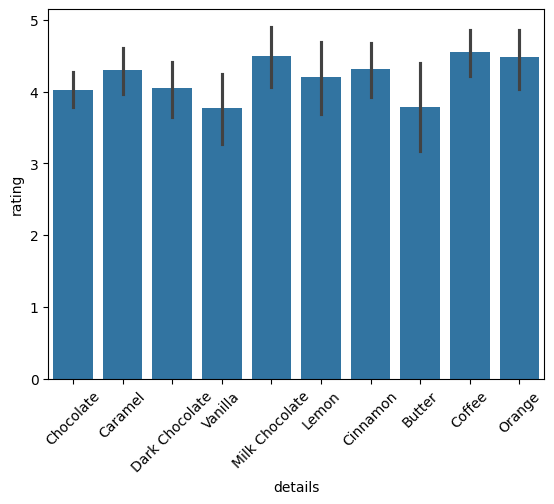

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(
    data=df_merged_inner,
    x='details',
    y='rating',
    estimator='mean',
    order=df_merged_inner['details'].value_counts().index[:10]
)
plt.xticks(rotation=45)

Trends over time

FacetGrid (small multiples per flavor)
I split the data so every flavor gets its own mini-trend chart. This way each flavor becomes readable. Trend direction becomes obvious (stable, increasing, decreasing, seasonal, etc.). This is the first visualization where patterns became meaningful. Some flavors like Vanilla show stable ratings, while others like Cinnamon show volatility.

In [47]:
top_flavors = df_merged_inner['details'].value_counts().head(10).index
trend_df_filtered = trend_df[trend_df['details'].isin(top_flavors)]

In [48]:
trend_df['rating_smooth'] = trend_df.groupby('details')['rating'].transform(lambda x: x.rolling(3, min_periods=1).mean())

In [49]:
# Merge reviews with product data
df_merged = pd.merge(
    df,
    df_reviews[['parent_asin', 'rating', 'timestamp']],
    on='parent_asin',
    how='left'
)

# Drop flavors with too few reviews
min_reviews = 30
valid_flavors = df_merged.groupby('details').size()
valid_flavors = valid_flavors[valid_flavors >= min_reviews].index
df_final = df_merged[df_merged['details'].isin(valid_flavors)]

# Sort by timestamp
df_final = df_final.sort_values('timestamp')

# Create smoothed rating
df_final['rating_smooth'] = (
    df_final.groupby('details')['rating']
           .transform(lambda x: x.rolling(3, min_periods=1).mean())
)




Plot Each Flavor Separately (FacetGrid)

/Users/emanarsham/Desktop/venv/lib/python3.14/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/emanarsham/Desktop/venv/lib/python3.14/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/emanarsham/Desktop/venv/lib/python3.14/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/emanarsham/Desktop/venv/lib/python3.14/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/emanarsham/Desktop/venv/lib/python3.14/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=No

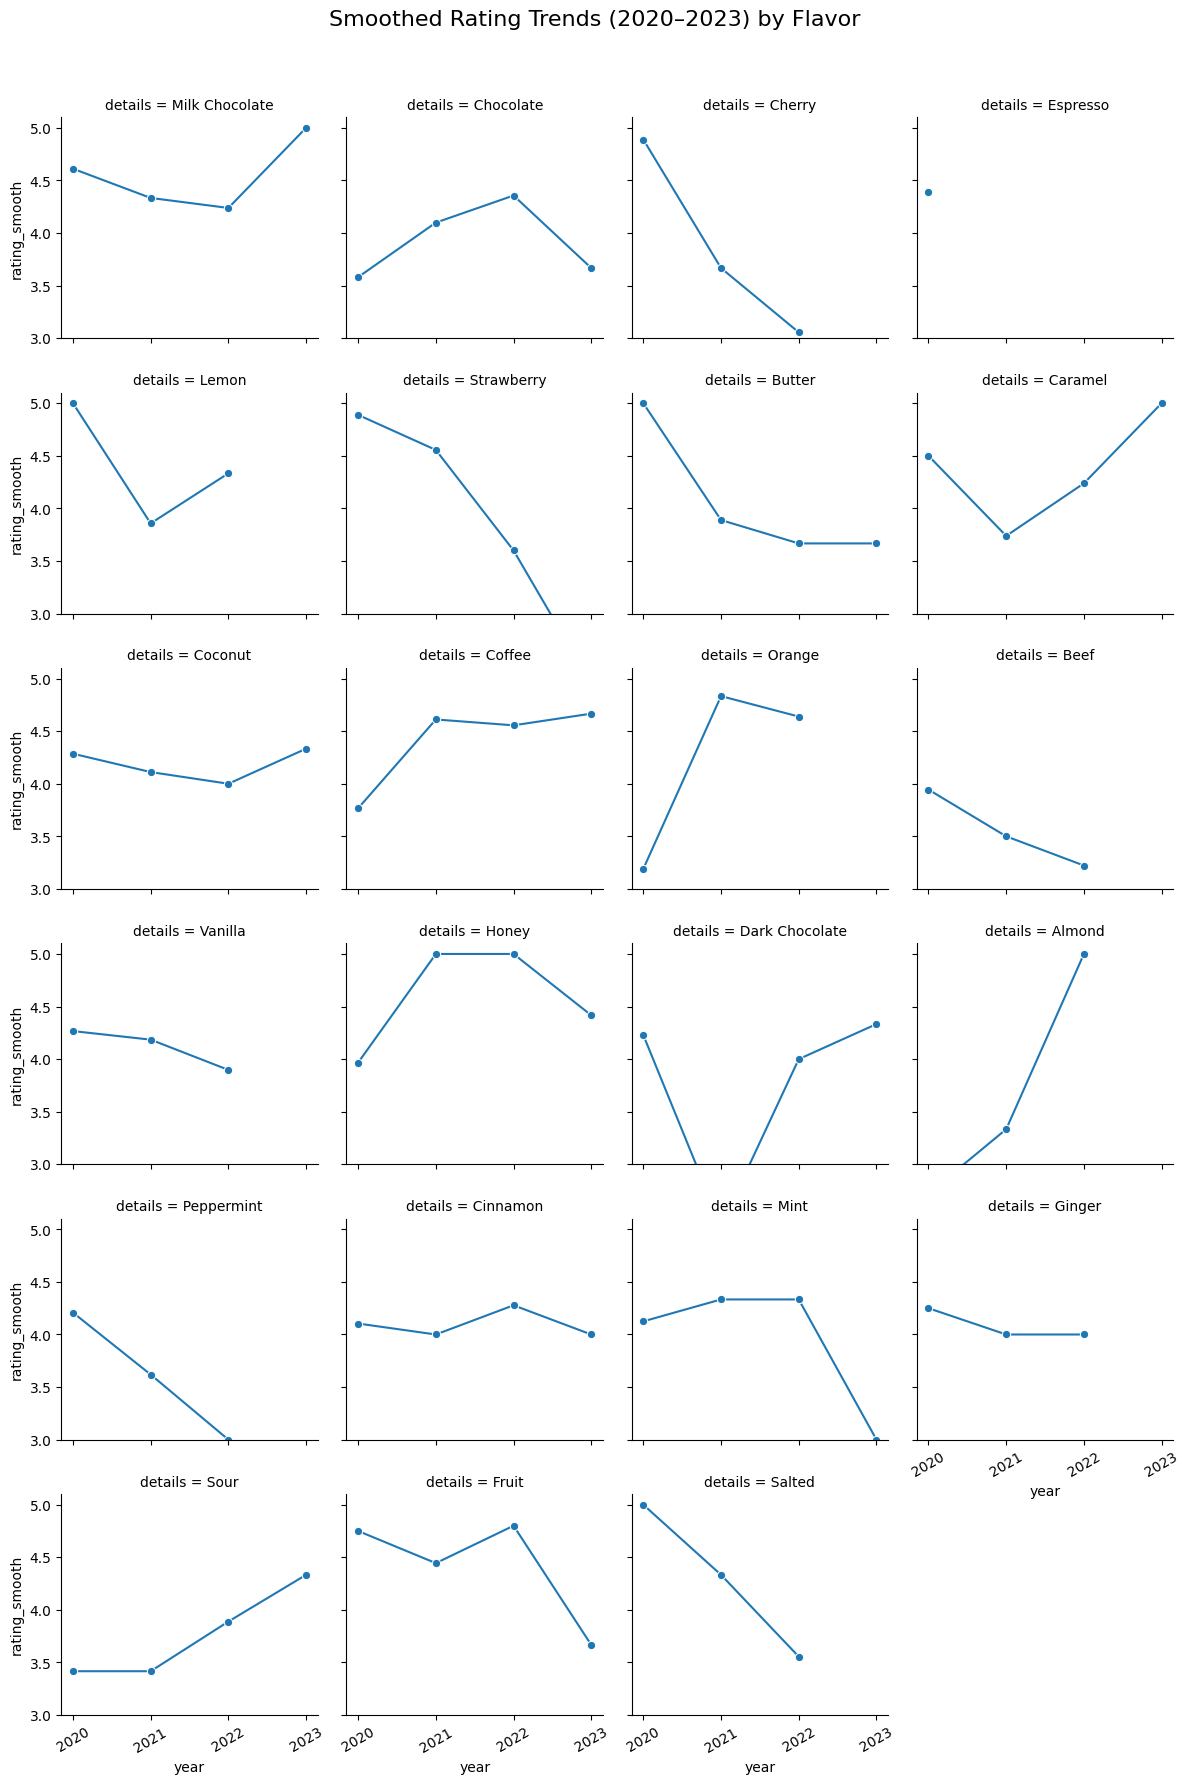

In [50]:
# ---------------------------
# 1. Filter to 2020–2023 Only
# ---------------------------

df_final['timestamp'] = pd.to_datetime(df_final['timestamp'], unit='ms', errors='coerce')
df_final['year'] = df_final['timestamp'].dt.year
df_final = df_final[df_final['year'] >= 2020]

# ------------------------------------------
# 2. Smooth Ratings (Rolling Mean)
# using a 3-point rolling window
# ------------------------------------------
df_filtered['rating_smooth'] = (
    df_filtered.sort_values('timestamp')
    .groupby('details')['rating']
    .transform(lambda x: x.rolling(3, min_periods=1).mean())
)

# ------------------------------------------
# 3. Plot FacetGrid Trends by Flavor
# ------------------------------------------
g = sns.relplot(
    data=df_filtered,
    x='year',
    y='rating_smooth',
    col='details',
    col_wrap=4,
    kind='line',
    ci=None,     
    height=3,
    marker='o', 
    facet_kws={'sharex': True, 'sharey': True}
)

# ------------------------------------------
# 4. Clean Up Tick Labels (NO MORE WEIRD LINES)
# ------------------------------------------
for ax in g.axes.flatten():
    ax.set_xticks([2020, 2021, 2022, 2023])  # clean yearly ticks
    ax.tick_params(axis='x', rotation=30)   # small, readable
    ax.set_ylim(3, 5.1)                     # consistent y-scale

plt.subplots_adjust(top=0.92)
g.fig.suptitle("Smoothed Rating Trends (2020–2023) by Flavor", fontsize=16)
plt.show()


Plot Top Flavors Together (Smoothed)

Text(0.5, 1.0, 'Average Review Rating per Flavor')

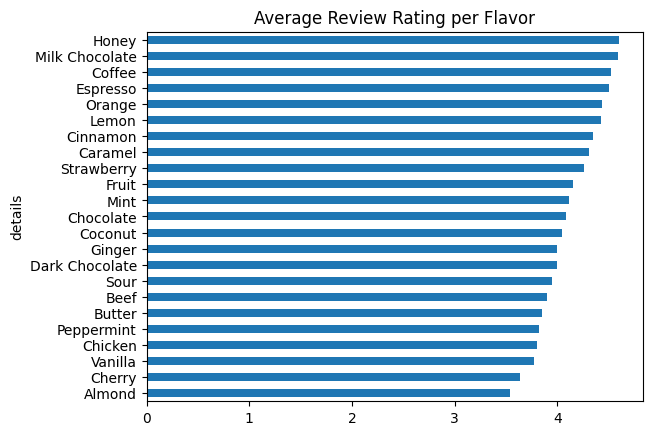

In [ ]:
df_final.groupby('details')['rating'].mean().sort_values().plot(kind='barh')
plt.title("Average Review Rating per Flavor")